# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Elfin Darmawan
- **Email:** elfins.darmawan@gmail.com
- **ID Dicoding:** elfin_darmawan_h5zy

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dipesan oleh pelanggan?
- Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Metode pembayaran apa yang paling populer digunakan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [8]:
customers_df = pd.read_csv("customers_dataset.csv")
print(customers_df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [9]:
orders_df = pd.read_csv("orders_dataset.csv")
print(orders_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [10]:
products_df = pd.read_csv("products_dataset.csv")
print(products_df.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [11]:
reviews_df = pd.read_csv("order_reviews_dataset.csv")
print(reviews_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [12]:
payments_df = pd.read_csv("order_payments_dataset.csv")
print(payments_df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [13]:
order_items_df = pd.read_csv("order_items_dataset.csv")
print(order_items_df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [14]:
product_translation_df = pd.read_csv("product_category_name_translation.csv")
print(product_translation_df.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


**Insight:**
- Dataset berhasil dimuat di directory lokal.
- Ada 6 data yang diupload yaitu: orders, products, reviews, payments, order items, dan product category translation (translate nama Produk).


### Assessing Data

In [15]:
# Menilai Data Order
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [18]:
#Menilai Data Product
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [18]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [22]:
#Menilai Data Reviews
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [25]:
#Menilai Data Payments
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [28]:
#Menilai Data Order Items
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [30]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Kolom tanggal masih dalam format string, perlu dikonversi ke datetime.
- Ada beberapa kolom dengan nilai null pada data reviews sehingga dihapus untuk lebih efektif dan akurat.


### Cleaning Data

In [31]:
#Membersihkan Tabel reviews (Missing Value)
reviews_df[reviews_df.review_comment_title.isna()]
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [32]:
reviews_df['review_comment_title'].fillna('No Title', inplace=True)
reviews_df['review_comment_message'].fillna('No Message', inplace=True)

C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_43664\954202409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['review_comment_title'].fillna('No Title', inplace=True)
C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_43664\954202409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [33]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [34]:
products_df['product_category_name'].fillna('No Name', inplace=True)
products_df['product_name_lenght'].fillna('No Name Lenght', inplace=True)
products_df['product_description_lenght'].fillna('No Desc Lenght', inplace=True)
products_df['product_photos_qty'].fillna('No Photos', inplace=True)
products_df['product_weight_g'].fillna('No Weight', inplace=True)
products_df['product_length_cm'].fillna('No Length(cm)', inplace=True)
products_df['product_height_cm'].fillna('No Height(cm)', inplace=True)
products_df['product_width_cm'].fillna('No Width(cm)', inplace=True)

C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_43664\2942916242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('No Name', inplace=True)
C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_43664\2942916242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [35]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [36]:
# Menghapus baris dengan tanggal pengiriman atau estimasi yang hilang karena tidak dapat diperbaiki
orders_df.dropna(subset=["order_purchase_timestamp", "order_estimated_delivery_date"], inplace=True)

# Mengisi metode pembayaran yang hilang dengan "unknown"
payments_df["payment_type"].fillna("unknown", inplace=True)


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_43664\1063940844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  payments_df["payment_type"].fillna("unknown", inplace=True)


In [37]:
# Menghapus outlier (contoh: pesanan dengan harga negatif atau jumlah produk yang tidak masuk akal)
order_items_df = order_items_df[(order_items_df["price"] >= 0) & (order_items_df["order_item_id"] > 0)]

In [38]:
# Mengonversi ke format datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


**Insight:**
- Kolom tanggal diubah ke format datetime pada tabel orders_df.
- Nilai Null pada tabel reviews sudah dihapus.
- Menghapus outlier yang tidak masuk akal, contohnya pada data order_items_df

## Exploratory Data Analysis (EDA)

In [40]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
12285,52220722b1316d8b493799035cb38463,2aa42e268eb5208e68313f4b5df1f4f9,90013,porto alegre,RS
95743,c95f04df0950db371171123b5675448a,00cc7c54469f4177319d6bb12e883652,68140,uruara,PA
39415,7df315ed766f2e365382e051a1642270,252ab93100eb1b94276be1e4c1259d55,81710,curitiba,PR
8032,f9e1d3693e689c53900412074666e86e,7f2ce1722207b68d4196b5f92f8ff2a1,5410,sao paulo,SP
22956,5fee1b2849ca2ad8d845cdb451b6f548,ab4d9d11f3eb0285fafb15e374a73b7a,84062,ponta grossa,PR


In [41]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [42]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,No Desc Lenght,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [43]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,90733,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,2018-02-27 04:31:10,NaN,NaN,NaN
freq,1,1,96478,NaN,9,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [44]:
payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [45]:
reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,No Title,No Message,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight**

- Mendescribe semua data untuk melihat nilai count, mean, min, max pada data yang memungkinkan untuk di analisis lebih lanjut dan dijadikan sebuah visualisasi data.

In [47]:
# Menggabungkan kategori produk dengan terjemahannya
products_df = products_df.merge(product_translation_df, on="product_category_name", how="left")

# Menggabungkan order_items dengan produk untuk mendapatkan kategori produk
order_items_df = order_items_df.merge(products_df[['product_id', 'product_category_name_english']], on='product_id', how='left')

# Menggabungkan order_items dengan pesanan untuk mendapatkan informasi pesanan
orders_extended_df = order_items_df.merge(orders_df, on="order_id", how="left")

# Menggabungkan dengan pembayaran untuk mendapatkan informasi metode pembayaran
orders_extended_df = orders_extended_df.merge(payments_df[['order_id', 'payment_type']], on="order_id", how="left")

# Menggabungkan dengan ulasan pelanggan untuk mendapatkan rating
orders_extended_df = orders_extended_df.merge(reviews_df[['order_id', 'review_score']], on="order_id", how="left")

# Menggabungkan dengan data pelanggan
orders_extended_df = orders_extended_df.merge(customers_df[['customer_id', 'customer_unique_id']], on="customer_id", how="left")

**Insight**
- Menambahkan nama kategori produk dalam bahasa Inggris untuk mempermudah analisis (Berguna untuk memahami kategori produk yang paling laris di tingkat global).
- Menghubungkan setiap item dalam pesanan dengan kategori produk yang sesuai (Memungkinkan analisis terkait produk yang paling sering dibeli pelanggan).
- Menghubungkan pesanan dengan data pesanan utama, memungkinkan analisis lebih luas tentang tren dan perilaku pembelian (Berguna untuk melihat volume pesanan dalam periode tertentu).
- Menghubungkan metode pembayaran dengan pesanan, memungkinkan analisis mengenai preferensi pelanggan dalam pembayaran (Bisa digunakan untuk mengidentifikasi metode pembayaran yang paling populer).

In [48]:
orders_extended_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,review_score,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,credit_card,5.0,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,credit_card,4.0,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,credit_card,5.0,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,credit_card,4.0,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,credit_card,5.0,64b576fb70d441e8f1b2d7d446e483c5
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,housewares,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06,boleto,4.0,85c835d128beae5b4ce8602c491bf385
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telephony,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04,credit_card,4.0,635d9ac1680f03288e72ada3a1035803
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,garden_tools,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25,credit_card,5.0,fda4476abb6307ab3c415b7e6d026526
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,health_beauty,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29,credit_card,1.0,639d23421f5517f69d0c3d6e6564cf0e
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,books_technical,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23,credit_card,4.0,0782c41380992a5a533489063df0eef6


In [65]:
# Menghitung jumlah pesanan per kategori produk
orders_extended_df.groupby("product_category_name_english").agg({
    "order_id": "count"
}).reset_index()

,product_category_name_english,order_id
0,agro_industry_and_commerce,252
1,air_conditioning,302
2,art,219
3,arts_and_craftmanship,24
4,audio,381
...,...,...
66,stationery,2625
67,tablets_printing_image,87
68,telephony,4726
69,toys,4281


**Insight**

(Produk tidak tampil semua sehingga hanya insight yang ada di tabel tersebut)
- Watches & Gifts (6,213 pesanan) adalah kategori produk yang paling populer, ini menunjukkan bahwa pelanggan memiliki minat tinggi terhadap jam tangan dan hadiah, yang bisa menjadi peluang untuk meningkatkan promosi di kategori ini.
- Telephony (4,726 pesanan) dan Toys (4,281 pesanan) juga termasuk dalam kategori dengan jumlah pesanan tinggi, produk-produk dalam kategori ini kemungkinan besar memiliki daya tarik yang kuat, baik karena kebutuhan fungsional (telepon) maupun hiburan (mainan).
- Arts and Craftsmanship (24 pesanan) dan Tablets, Printing & Image (87 pesanan) adalah kategori dengan jumlah pesanan yang sangat sedikit, ini menunjukkan bahwa produk-produk dalam kategori ini memiliki daya tarik yang lebih rendah bagi pelanggan.
- Stationery (2,625 pesanan) menunjukkan bahwa alat tulis masih memiliki permintaan yang cukup besar.

In [56]:
# Menghitung jumlah pesanan per bulan
orders_df.groupby("purchase_month").agg({
    "order_id": "count"
}).reset_index()

,purchase_month,order_id
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


**Insight**
- Pada awal periode (2016-09), jumlah pesanan sangat rendah (hanya 4 pesanan).
- Mulai awal 2017, jumlah pesanan meningkat secara konsisten.
- Puncak pesanan terjadi pada November 2017 (7,544 pesanan) dan Januari 2018 (7,269 pesanan), menunjukkan adanya peningkatan permintaan pada periode ini.

In [57]:
# Menghitung jumlah transaksi berdasarkan metode pembayaran
orders_extended_df.groupby("payment_type").agg({
    "order_id": "count", 
}).reset_index()

,payment_type,order_id
0,boleto,23018
1,credit_card,87258
2,debit_card,1699
3,voucher,6332


**Insight**
- Credit Card (87,258 transaksi) merupakan metode pembayaran yang paling banyak digunakan oleh pelanggan. (Ini menunjukkan bahwa mayoritas pelanggan lebih memilih menggunakan kartu kredit untuk melakukan transaksi)
- Boleto (23,018 transaksi) adalah metode pembayaran kedua yang paling banyak digunakan. (Boleto adalah metode pembayaran khas di Brasil, yang menunjukkan bahwa pasar ini memiliki kebiasaan pembayaran yang berbeda dengan negara lain yang lebih mengandalkan kartu kredit)
- Debit Card hanya digunakan dalam 1,699 transaksi, jauh lebih sedikit dibandingkan Credit Card dan Boleto. (Ini bisa menunjukkan bahwa pelanggan lebih memilih metode pembayaran yang memberikan fleksibilitas atau keuntungan tambahan seperti cicilan kartu kredit)
- Voucher (6,332 transaksi) menunjukkan bahwa beberapa pelanggan memanfaatkan promo atau sistem reward yang disediakan oleh platform e-commerce.
(Penggunaan voucher dapat didorong lebih lanjut melalui program loyalitas atau diskon khusus untuk meningkatkan retensi pelanggan).


In [58]:
# Ekstrak bulan dan tahun dari purchase timestamp
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Kelompokkan berdasarkan bulan dan hitung pesanan
monthly_orders = orders_df.groupby('purchase_month').size().reset_index(name='order_count')

# Menghitung jumlah penggunaan setiap metode pembayaran
payment_counts = payments_df["payment_type"].value_counts()

**Insight:**
- Pada bagian Explore produk yang paling banyak dipesan yaitu Menggabungkan tabel order_items_df dengan products_df dan Menghitung jumlah pesanan per kategori.
- Pada bagian tren jumlah pesanan yaitu mengekstrak bulan dan tahun pada kolom order_purchase_timestamp, menghitung jumlah pesanan per bulan.
- Pada bagian Explore Pengaruh Keterlambatan pengiriman terhadap rating ulasan yaitu Menggabungkan tabel orders_df dengan reviews_df, Menghitung keterlambatan pengiriman, Mengelompokkan berdasarkan keterlambatan dan hitung rata-rata rating.
- Pada bagian Explore Metode Pembayaran yang paling populer yaitu menghitung frekuensi metode pembayaran

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak dipesan oleh pelanggan?

C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_26372\2686964575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


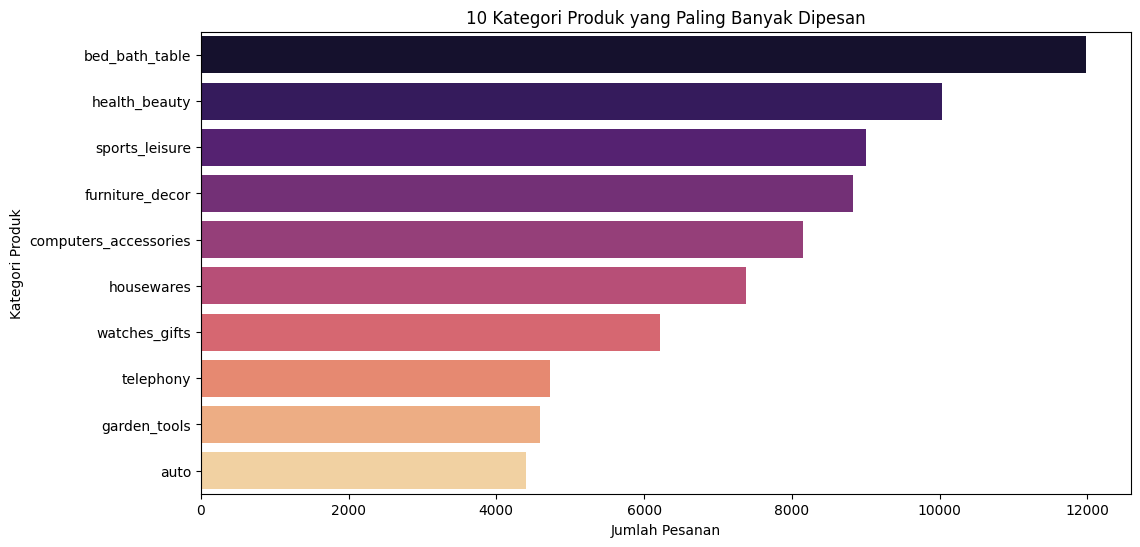

In [41]:
# Menghitung jumlah pesanan per kategori produk
top_categories = orders_extended_df['product_category_name_english'].value_counts().head(10)

# Visualisasi kategori 10 produk teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk yang Paling Banyak Dipesan")
plt.show()

**Explanatory Analysis:**
- Kategori "bed_bath_table" adalah yang paling banyak dipesan, dengan jumlah pesanan mendekati 12.000. Ini menunjukkan bahwa pelanggan memiliki minat tinggi terhadap produk perlengkapan rumah tangga.
- Kategori "health_beauty" berada di posisi kedua, menandakan bahwa produk kesehatan dan kecantikan juga sangat diminati oleh pelanggan.
- Kategori lain yang populer mencakup "sports_leisure", "furniture_decor", dan "computers_accessories", yang mencerminkan permintaan tinggi untuk produk olahraga, dekorasi rumah, dan aksesoris komputer.
- Kategori "telephony", "garden_tools", dan "auto" memiliki jumlah pesanan yang lebih rendah dibandingkan kategori lainnya, tetapi tetap masuk dalam 10 besar.
  
**Insight:** kategori produk seperti bed_bath_table, health_beauty, dan sports_leisure adalah 3 kategori yang paling populer (best of the best) dari 10 kategori yang populer.

**Rekomendasi:** Fokuskan strategi pemasaran dan stok pada kategori produk yang paling diminati agar tetap stabil dan adanya peningkatan.

### Pertanyaan 2: Bagaimana tren jumlah pesanan dari waktu ke waktu?

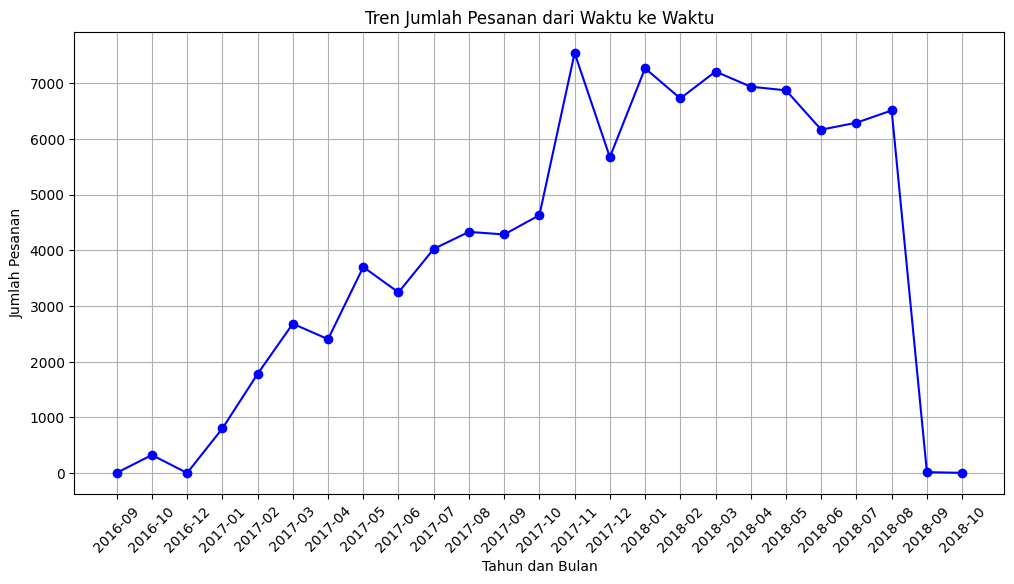

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['purchase_month'].astype(str), monthly_orders['order_count'], marker='o', color='b')
plt.title('Tren Jumlah Pesanan dari Waktu ke Waktu')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Explanatory Analysis:**
- Awal periode: Terdapat sedikit pesanan, dengan jumlah yang meningkat secara bertahap.
- Pertumbuhan pesanan: Setelah beberapa bulan, terjadi peningkatan signifikan dalam jumlah pesanan, menunjukkan adanya tren naik.
- Puncak pesanan: Jumlah pesanan mencapai titik tertinggi pada pertengahan periode, sebelum mengalami sedikit fluktuasi.
- Fluktuasi stabil: Setelah mencapai puncaknya, jumlah pesanan tetap tinggi dengan sedikit naik-turun, menunjukkan kestabilan pasar.
- Penurunan tajam di akhir periode: Penurunan yang sangat drastis pada bulan terakhir bisa menjadi indikasi adanya faktor eksternal atau data yang tidak lengkap.

**Insight:** Tren pesanan menunjukkan peningkatan yang signifikan pada bulan November dan Desember pada tahun 2017, yang kemungkinan besar terkait dengan musim liburan dan promosi akhir tahun seperti Natal. Selain itu, ada penurunan dan kenaikan pesanan pada bulan Januari dan Februari pada tahun 2018, yang mungkin disebabkan oleh penurunan aktivitas belanja setelah musim liburan. Untuk seterusnya ada kenaikan dan penurunan seiring berjalannya waktu.

**Rekomendasi:** Perusahaan harus mempersiapkan stok dan logistik yang memadai untuk menghadapi peningkatan pesanan pada akhir tahun. Selain itu, strategi pemasaran seperti diskon atau bundling produk dapat diterapkan untuk mempertahankan volume penjualan pada bulan-bulan yang cenderung sepi dan jangan sampai mengalami penurunan yang sangat drastis.


### Pertanyaan 3: Metode pembayaran apa yang paling populer digunakan oleh pelanggan?

C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_26372\3800775594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")


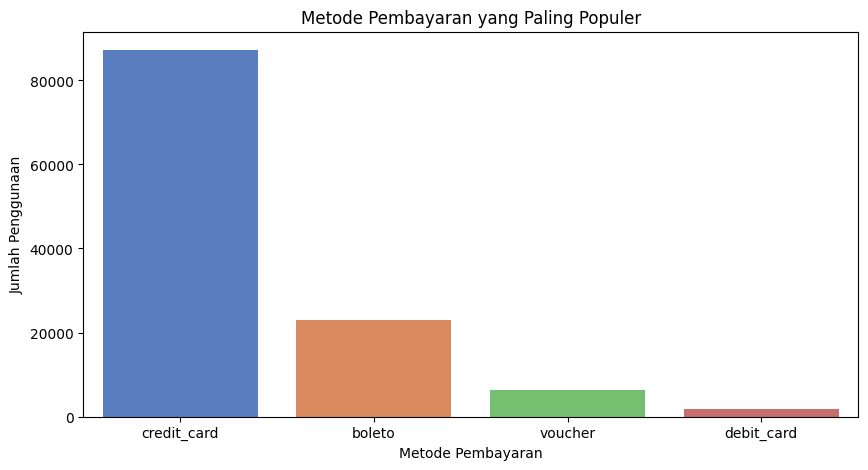

In [43]:
payment_counts = orders_extended_df["payment_type"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="muted")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Penggunaan")
plt.title("Metode Pembayaran yang Paling Populer")
plt.show()

**Explanatory Analysis:**
- Kartu kredit menjadi pilihan utama kemungkinan karena kemudahan transaksi dan fitur seperti cicilan, cashback, atau reward points.
- Banyak pelanggan mungkin memiliki akses lebih luas ke kartu kredit dibandingkan metode pembayaran lain.
- Boleto (sistem pembayaran khas Brasil) masih digunakan tetapi jauh lebih sedikit dibandingkan kartu kredit.
- Voucher biasanya digunakan dalam promo atau diskon terbatas, sehingga penggunaannya lebih sedikit.
- Debit card lebih jarang digunakan, mungkin karena sebagian besar pelanggan lebih memilih kredit untuk fleksibilitas pembayaran.
  
**Insight:** 
- Kartu kredit adalah metode pembayaran yang paling dominan digunakan pelanggan, sedangkan metode lain jauh lebih sedikit digunakan. 
- Perlu strategi khusus untuk meningkatkan penggunaan metode pembayaran lain agar lebih berimbang.
- Promosi berbasis metode pembayaran dapat digunakan untuk meningkatkan konversi transaksi dan loyalitas pelanggan. 🚀

**Rekomendasi:** Pertimbangkan untuk menawarkan insentif atau diskon bagi pelanggan yang menggunakan metode pembayaran yang kurang populer, seperti voucher atau debit card, untuk meningkatkan penggunaannya. Selain itu, pastikan sistem pembayaran dengan kartu kredit tetap lancar dan aman, mengingat ini adalah metode yang paling banyak digunakan oleh customer.

### Analisis Lanjutan (RFM Analysis)

In [44]:
# Menentukan tanggal referensi untuk analisis RFM
latest_date = orders_extended_df["order_purchase_timestamp"].max()

# Menghitung metrik RFM untuk setiap pelanggan
rfm_df = orders_extended_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (latest_date - x.max()).days,  # Recency (selisih hari dari pembelian terakhir)
    "order_id": "nunique",  # Frequency (jumlah pesanan unik)
    "price": "sum"  # Monetary (total uang yang dibelanjakan)
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

# Menampilkan 5 baris pertama dari dataframe RFM
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_26372\1960919149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_sorted['customer_unique_id'], y=rfm_sorted['Recency'], palette='Blues')
C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_26372\1960919149.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_sorted['customer_unique_id'], y=rfm_sorted['Frequency'], palette='Greens')
C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_26372\1960919149.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_sorted['customer_unique_id

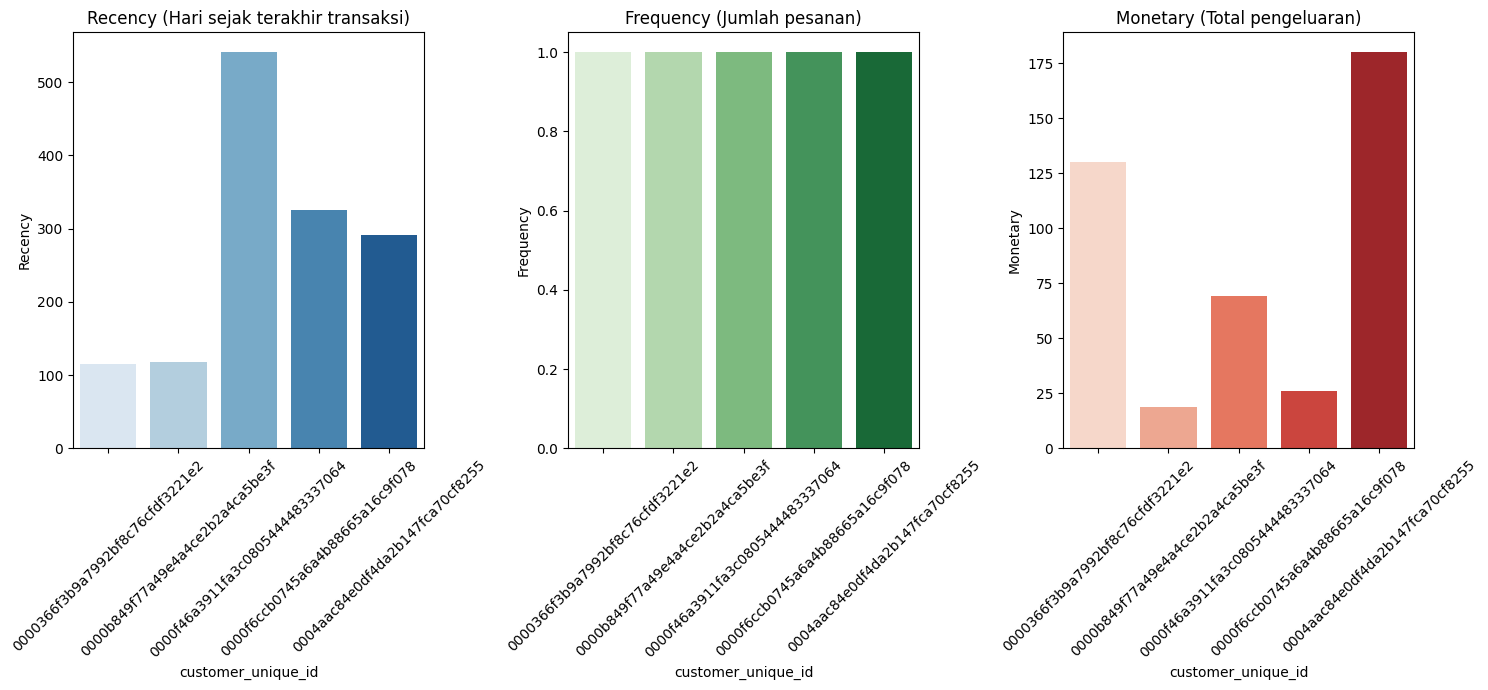

In [62]:
# Mengambil 5 data teratas
rfm_sorted = rfm_df.head(5)

# Set ukuran figure
plt.figure(figsize=(15, 7))

# Plot barplot untuk Recency, Frequency, dan Monetary
plt.subplot(1, 3, 1)
sns.barplot(x=rfm_sorted['customer_unique_id'], y=rfm_sorted['Recency'], palette='Blues')
plt.xticks(rotation=45)
plt.title('Recency (Hari sejak terakhir transaksi)')

plt.subplot(1, 3, 2)
sns.barplot(x=rfm_sorted['customer_unique_id'], y=rfm_sorted['Frequency'], palette='Greens')
plt.xticks(rotation=45)
plt.title('Frequency (Jumlah pesanan)')

plt.subplot(1, 3, 3)
sns.barplot(x=rfm_sorted['customer_unique_id'], y=rfm_sorted['Monetary'], palette='Reds')
plt.xticks(rotation=45)
plt.title('Monetary (Total pengeluaran)')

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

**Insight:**
- Pelanggan dengan ID 000366f3b9792bf26c7dcf3221e2 memiliki nilai Recency yang paling kecil, artinya pelanggan ini baru saja melakukan transaksi.
- Sebaliknya, pelanggan dengan ID 0004f6a391f1a30c85a4448333706f4 memiliki nilai Recency tertinggi, yang berarti pelanggan ini sudah lama tidak melakukan transaksi.
- Semua pelanggan dalam daftar ini memiliki jumlah pesanan yang relatif sama (mendekati 1).
- Hal ini menunjukkan bahwa kebanyakan pelanggan dalam sampel ini hanya melakukan satu transaksi.
- Pelanggan dengan ID 0004aced8cd4d8a2b147ca70cf8255 memiliki nilai Monetary tertinggi, menunjukkan bahwa mereka menghabiskan uang paling banyak dalam transaksi mereka.
- Sebaliknya, pelanggan dengan ID 000849f77a49e48c2ba24ca5eb3f memiliki nilai Monetary terendah, artinya mereka melakukan transaksi dengan nilai yang kecil.
- Sebagian besar pelanggan memiliki nilai Recency yang tinggi, artinya mereka belum melakukan transaksi dalam waktu yang cukup lama.
- Sebagian besar pelanggan hanya melakukan satu kali transaksi (nilai Frequency = 1). Hal ini mengindikasikan bahwa bisnis memiliki tantangan dalam mempertahankan pelanggan untuk melakukan pembelian berulang.
- Sebagian besar pelanggan memiliki nilai Monetary yang rendah, artinya mayoritas pembeli hanya berbelanja dalam jumlah kecil.

## Conclusion

**Conclution pertanyaan 1 (Kategori Produk Populer):**
- Kategori produk yang paling banyak dipesan adalah "bed_bath_table", diikuti oleh "health_beauty" dan "sports_leisure".
- Produk dalam kategori rumah tangga dan perawatan diri mendominasi permintaan pelanggan.
- Strategi bisnis dapat difokuskan pada peningkatan stok, promosi, dan diskon pada kategori populer ini untuk meningkatkan penjualan.

**Conclution pertanyaan 2 (Tren Jumlah Pesanan):** 
- Peningkatan pesanan pada akhir tahun memerlukan persiapan stok dan logistik yang memadai. Strategi pemasaran seperti diskon atau bundling produk dapat membantu mempertahankan volume penjualan untuk kedepannya.
- Tren jumlah pesanan menunjukkan pertumbuhan yang signifikan dari waktu ke waktu, dengan peningkatan yang stabil.
- Puncak pesanan terlihat pada titik tertentu, kemungkinan dipengaruhi oleh faktor eksternal seperti promosi atau musim belanja.
- Namun, terdapat penurunan tajam di akhir periode, yang bisa disebabkan oleh perubahan tren pasar, berkurangnya promosi, atau faktor eksternal lainnya.

**Conclusion pertanyaan 3 (Metode Pembayaran yang Paling Populer):** 
- Tawarkan insentif untuk metode pembayaran yang kurang populer, seperti voucher atau debit card, untuk meningkatkan penggunaannya.
- Kartu kredit (credit_card) menjadi metode pembayaran yang paling dominan dibandingkan dengan metode lain seperti boleto, voucher, dan debit card.
- Boleto dan voucher memiliki penggunaan yang jauh lebih rendah, menunjukkan preferensi pelanggan terhadap fleksibilitas kartu kredit.
- Bisnis dapat memanfaatkan tren ini dengan menawarkan promo diskon atau cicilan khusus untuk pengguna kartu kredit serta meningkatkan insentif bagi metode pembayaran lain agar lebih seimbang.

In [ ]:
final_df = orders_extended_df.merge(rfm_df, on="customer_unique_id", how="left")
final_df.to_csv('main_data.csv',index=False)